# Melbourne's Cultural Analysis


by Afonso Cunha (s233177) and Kajsa Christina Öhman (s240167)

# 1. Motivation

Initially our main goal was to analyse how and why is Melbourne considered so relevant as a Music city. We know that in many genres Australia has an amazing and diverse set of artists however we wanted to understand and show why Melbourne was considered a Musical City. In order to do this, we went search for datasets (mainly Open Data datasets provided by Australian Government or Melbourne's City) that would aid us on answering our questions. Eventually, besides the live music venues dataset, we understood that many of the datasets we needed to really delve into this question were either not available or behind a paywall.

This way, we decided to make a small change. We changed to focus from music only and started analysing the cultural city of Melbourne. Showing how dense it is, the different type of venues for music, the liveability and rising jobs and establishments. Combining to these we also anlysed parking spots. All these datasets had one main goal which was to learn more about Melbourne's culture, how it's built, life there and perhaps, together with previously made studies, understand why music is so relevant.

### Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import plotly.express as px
from bokeh.io import show
from bokeh.models import (AnnularWedge, ColumnDataSource,
                          Legend, LegendItem, Plot, Range1d)
from bokeh.core.properties import value
from bokeh.plotting import ColumnDataSource, output_file, figure, show
from bokeh.transform import cumsum, factor_cmap
from math import pi
from bokeh.palettes import Category20
import plotly.io as pio

### Data Load

In [2]:
repo_dir = os.path.dirname(os.path.abspath(""))
print(repo_dir)

c:\Users\Afonso Cunha\Desktop\DTU\2nd Semester\Social Data and Visualization\kajsaohman.github.io


In [3]:
music_csv_path = os.path.join(
    "..", "data", "live-music-venues.csv")

live_venues_data = pd.read_csv(music_csv_path)
live_venues_data.head()

property_number                    venue_name  \
0           609454                       Alumbra   
1           506429  Sofitel Melbourne On Collins   
2           646930                  Bar Nacional   
3           681513   Bomba Tapas Bar and Rooftop   
4           565482              Melbourne Museum   

                                       venue_address     space_type  \
0          Shed 9, Victoria Harbour, Docklands, 3008      Nightclub   
1  Sofitel Hotel, Collins Tower, 25 Collins Stree...  Accommodation   
2  Tenancy 47, Ground, 727 Collins Street, Dockla...            Bar   
3  Ground & Rooftop, 103 Lonsdale Street, Melbour...            Bar   
4                 11 Nicholson Street, Carlton, 3053         Museum   

                                           website        lat         lon  \
0                       http://www.alumbra.com.au/ -37.816569  144.943835   
1             http://www.sofitel-melbourne.com.au/ -37.813765  144.972923   
2                   http://www.barnacional.com.au/ -37.820467  144.949823   
3                         https://bombabar.com.au/ -37.810381  144.969236   
4  https://museumsvictoria.com.au/melbournemuseum/ -37.803728  144.973731   

                                    location  \
0     POINT (144.943834998348 -37.816568815)   
1  POINT (144.972923487598 -37.813765267006)   
2  POINT (144.949822902931 -37.820467259122)   
3  POINT (144.969235763373 -37.810380634625)   
4  POINT (144.973731480634 -37.803728470513)   

                              geolocation  
0  -37.81656881500009, 144.94383499834845  
1   -37.81376526700552, 144.9729234875978  
2  -37.82046725912159, 144.94982290293075  
3   -37.81038063462455, 144.9692357633733  
4  -37.80372847051283, 144.97373148063383

In [4]:
landmarks_csv_path = os.path.join(
    "..", "data", "landmarks-and-places-of-interest-including-schools-theatres-health-services-spor.csv")

landmarks_data = pd.read_csv(landmarks_csv_path)
landmarks_data.head()

Theme Sub Theme                 Feature Name  \
0  Place of Worship    Church            St Francis Church   
1  Place of Worship    Church              St James Church   
2  Place of Worship    Church    St Mary's Anglican Church   
3  Place of Worship    Church                 Scots Church   
4  Place of Worship    Church  St Michael's Uniting Church   

                          Co-ordinates  
0  -37.8118847831837, 144.962422614541  
1  -37.8101281201969, 144.952468571683  
2  -37.8031663672997, 144.953761537074  
3   -37.8145687802664, 144.96855105335  
4  -37.8143851324913, 144.969174036096

In [5]:
on_street_parking_csv_path = os.path.join(
    "..", "data", "on-street-parking-bay-sensors.csv")

on_street_parking_data = pd.read_csv(on_street_parking_csv_path)
on_street_parking_data.head()

Lastupdated           Status_Timestamp  Zone_Number  \
0  2023-12-14T05:45:34+01:00  2023-12-14T04:41:25+01:00       7695.0   
1  2023-12-14T05:45:34+01:00  2023-12-13T07:21:58+01:00       7939.0   
2  2023-12-15T00:45:34+01:00  2023-12-15T00:35:02+01:00          NaN   
3  2023-12-15T00:45:34+01:00  2023-12-14T23:39:46+01:00          NaN   
4  2023-12-18T05:45:34+01:00  2023-12-18T00:47:54+01:00       7310.0   

  Status_Description  KerbsideID                                 Location  
0         Unoccupied       22959   -37.81844776554182, 144.95938672872117  
1         Unoccupied       10136    -37.8099909364941, 144.95263753679632  
2         Unoccupied        6527   -37.81060096851364, 144.95642622505966  
3         Unoccupied        6526  -37.810581463657826, 144.95649292476088  
4         Unoccupied        6497   -37.81044576734748, 144.95648958199024

In [6]:
off_street_parking_csv_path = os.path.join(
    "..", "data", "off-street-car-parks-with-capacity-and-type.csv")

off_street_parking_data = pd.read_csv(off_street_parking_csv_path)
off_street_parking_data.head()

Census year  Block ID  Property ID  Base property ID  \
0         2002        11       103957            103957   
1         2002        11       103987            103987   
2         2002        11       103990            103990   
3         2002        11       559405            559405   
4         2002        12       103999            103999   

                         Building address  CLUE small area Parking type  \
0    517-537 Flinders Lane MELBOURNE 3000  Melbourne (CBD)   Commercial   
1  550-554 Flinders Street MELBOURNE 3000  Melbourne (CBD)   Commercial   
2  524-528 Flinders Street MELBOURNE 3000  Melbourne (CBD)      Private   
3    547-555 Flinders Lane MELBOURNE 3000  Melbourne (CBD)  Residential   
4      1-13 William Street MELBOURNE 3000  Melbourne (CBD)      Private   

   Parking spaces   Longitude   Latitude  \
0             109  144.956496 -37.819877   
1              10  144.956014 -37.820539   
2               6  144.956765 -37.820276   
3               9  144.955848 -37.820021   
4             121  144.959520 -37.819434   

                                  location  
0  -37.819876823594235, 144.95649587057954  
1   -37.82053927339685, 144.95601406145283  
2   -37.82027622796712, 144.95676491003604  
3   -37.82002087328659, 144.95584764401497  
4   -37.81943441954169, 144.95952036484613

In [7]:
social_csv_path = os.path.join(
    "..", "data", "city-of-melbourne-liveability-and-social-indicators.csv")

social_data = pd.read_csv(social_csv_path)
social_data.head()

type    topic     id  \
0  Liveability  Economy  ECO_1   
1  Liveability  Economy  ECO_2   
2  Liveability  Economy  ECO_3   
3  Liveability  Economy  ECO_4   
4  Liveability  Economy  ECO_4   

                                           indicator             period  \
0                           City's unemployment rate    2015 (June Qtr)   
1  Assessed value of commercial and industrial pr...  2015 (at 30 June)   
2    Percentage of city population living in poverty               2015   
3  Percentage of persons (city population) in ful...    2017 (June Qtr)   
4  Percentage of persons (city population) in ful...    2014 (June Qtr)   

           numerator         denominator  value  value_type  \
0              3,942              84,942   4.64  Percentage   
1  48,331,069,777.00  101,671,404,180.00  47.54  Percentage   
2             13,177             136,872   9.63  Percentage   
3             68,722             159,141  43.18  Percentage   
4             55,359             127,975  43.26  Percentage   

                                             sources  
0  Australian Government Department of Employment...  
1    City of Melbourne, Property Services, 2015-2018  
2  Geografia, Relative Poverty and Employment Mea...  
3  Geografia, Relative Poverty and Employment Mea...  
4  Geografia, Relative Poverty and Employment Mea...

In [8]:

jobs_csv_path = os.path.join(
    "..", "data", "business-establishments-and-jobs-data-by-business-size-and-industry.csv")

jobs_data = pd.read_csv(jobs_csv_path)
jobs_data.head()

Census year               CLUE small area  \
0         2007  West Melbourne (Residential)   
1         2006                       Carlton   
2         2006                       Carlton   
3         2006                       Carlton   
4         2006                       Carlton   

                       ANZSIC indusrty                  CLUE industry  \
0    Transport, Postal and Warehousing  Transport, Postal and Storage   
1      Accommodation and Food Services                  Accommodation   
2  Administrative and Support Services     Admin and Support Services   
3         Arts and Recreation Services   Arts and Recreation Services   
4                         Construction                   Construction   

     Business size  Total establishments  Total jobs  
0   Small business                    20       132.0  
1   Small business                    17       102.0  
2    Non employing                     1         NaN  
3  Medium business                     4       207.0  
4  Medium business                     5       196.0

# 2. Basic stats

For our datasets we mainly divided into two parts. First part were more map-focused datasets in which we include Landmarks dataset, Live Music Venues, Off Street Parking and On Street Parking and second part were most statistical or population-focused datasets that were mainly investigated later during the data analysis.

In order to clean the map related datasets, in the end, we wanted to make sure that:
- There were no empty or NA data as it would be worthless for use in terms of visualizations
- All the datasets location related values had the same necessary format for map visualization
- These were had uniform location data columns
These last two were a big factor that facilitated the map creation as we made sure that everything both column and value-wise was correct

In our approach for our mapping datasets, we wanted to understand how they they were structured, what kind of types of venues and landmarks were predominant in our data and how they clustered (seen in visualizations section).

### Data Handling

#### General Stats

##### Live Venues

In [9]:
num_rows, num_columns = live_venues_data.shape

file_size_mb = os.path.getsize(music_csv_path) / (1024 * 1024)  # in MB

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"File size: {file_size_mb:.2f} MB")

Number of rows: 227
Number of columns: 9
File size: 0.05 MB


In [10]:
data_types = live_venues_data.dtypes

print("Data types:")
print(data_types)

Data types:
property_number      int64
venue_name          object
venue_address       object
space_type          object
website             object
lat                float64
lon                float64
location            object
geolocation         object
dtype: object


In [11]:

missing_values = live_venues_data.isnull().sum()
missing_percentage = (missing_values / len(live_venues_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("Missing Values:")
print(missing_data)

Missing Values:
                 Missing Values  Percentage
property_number               0    0.000000
venue_name                    0    0.000000
venue_address                 0    0.000000
space_type                   23   10.132159
website                      25   11.013216
lat                           0    0.000000
lon                           0    0.000000
location                      0    0.000000
geolocation                   0    0.000000


##### Landmarks and Places of Interest

In [12]:
num_rows, num_columns = landmarks_data.shape

file_size_mb = os.path.getsize(landmarks_csv_path) / (1024 * 1024)  # in MB

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"File size: {file_size_mb:.2f} MB")

Number of rows: 242
Number of columns: 4
File size: 0.02 MB


In [13]:
data_types = landmarks_data.dtypes

print("Data types:")
print(data_types)

Data types:
Theme           object
Sub Theme       object
Feature Name    object
Co-ordinates    object
dtype: object


In [14]:

missing_values = landmarks_data.isnull().sum()
missing_percentage = (missing_values / len(landmarks_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("Missing Values:")
print(missing_data)

Missing Values:
              Missing Values  Percentage
Theme                      0         0.0
Sub Theme                  0         0.0
Feature Name               0         0.0
Co-ordinates               0         0.0


##### Off Street Parking

In [15]:
num_rows, num_columns = off_street_parking_data.shape

file_size_mb = os.path.getsize(off_street_parking_csv_path) / (1024 * 1024)  # in MB

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"File size: {file_size_mb:.2f} MB")

Number of rows: 136836
Number of columns: 11
File size: 21.25 MB


In [16]:
data_types = off_street_parking_data.dtypes

print("Data types:")
print(data_types)

Data types:
Census year           int64
Block ID              int64
Property ID           int64
Base property ID      int64
Building address     object
CLUE small area      object
Parking type         object
Parking spaces        int64
Longitude           float64
Latitude            float64
location             object
dtype: object


In [17]:

missing_values = off_street_parking_data.isnull().sum()
missing_percentage = (
    missing_values / len(off_street_parking_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("Missing Values:")
print(missing_data)

Missing Values:
                  Missing Values  Percentage
Census year                    0    0.000000
Block ID                       0    0.000000
Property ID                    0    0.000000
Base property ID               0    0.000000
Building address               0    0.000000
CLUE small area                0    0.000000
Parking type                   0    0.000000
Parking spaces                 0    0.000000
Longitude                   1084    0.792189
Latitude                    1084    0.792189
location                    1084    0.792189


##### On Street Parking

In [18]:
num_rows, num_columns = on_street_parking_data.shape

file_size_mb = os.path.getsize(on_street_parking_csv_path) / (1024 * 1024)  # in MB

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"File size: {file_size_mb:.2f} MB")

Number of rows: 6245
Number of columns: 6
File size: 0.68 MB


In [19]:
data_types = on_street_parking_data.dtypes

print("Data types:")
print(data_types)

Data types:
Lastupdated            object
Status_Timestamp       object
Zone_Number           float64
Status_Description     object
KerbsideID              int64
Location               object
dtype: object


In [20]:

missing_values = on_street_parking_data.isnull().sum()
missing_percentage = (missing_values / len(on_street_parking_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("Missing Values:")
print(missing_data)

Missing Values:
                    Missing Values  Percentage
Lastupdated                      0    0.000000
Status_Timestamp                 0    0.000000
Zone_Number                    486    7.782226
Status_Description               0    0.000000
KerbsideID                       0    0.000000
Location                         0    0.000000


##### Jobs data

In [21]:
num_rows, num_columns = jobs_data.shape

file_size_mb = os.path.getsize(jobs_csv_path) / (1024 * 1024)  # in MB

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"File size: {file_size_mb:.2f} MB")

Number of rows: 14692
Number of columns: 7
File size: 1.36 MB


In [22]:
data_types = jobs_data.dtypes

print("Data types:")
print(data_types)

Data types:
Census year               int64
CLUE small area          object
ANZSIC indusrty          object
CLUE industry            object
Business size            object
Total establishments      int64
Total jobs              float64
dtype: object


In [23]:

missing_values = jobs_data.isnull().sum()
missing_percentage = (missing_values / len(jobs_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("Missing Values:")
print(missing_data)

Missing Values:
                      Missing Values  Percentage
Census year                        0    0.000000
CLUE small area                    0    0.000000
ANZSIC indusrty                    0    0.000000
CLUE industry                      0    0.000000
Business size                      0    0.000000
Total establishments               0    0.000000
Total jobs                      4327   29.451402


##### Liveability data

In [24]:
num_rows, num_columns = social_data.shape

file_size_mb = os.path.getsize(social_csv_path) / (1024 * 1024)  # in MB

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"File size: {file_size_mb:.2f} MB")

Number of rows: 319
Number of columns: 10
File size: 0.08 MB


In [25]:
data_types = social_data.dtypes

print("Data types:")
print(data_types)

Data types:
type            object
topic           object
id              object
indicator       object
period          object
numerator       object
denominator     object
value          float64
value_type      object
sources         object
dtype: object


In [26]:

missing_values = social_data.isnull().sum()
missing_percentage = (missing_values / len(social_data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("Missing Values:")
print(missing_data)

Missing Values:
             Missing Values  Percentage
type                      0    0.000000
topic                     0    0.000000
id                        0    0.000000
indicator                 0    0.000000
period                    0    0.000000
numerator               102   31.974922
denominator              25    7.836991
value                     1    0.313480
value_type                0    0.000000
sources                   0    0.000000


#### Coordinates and Empty Values Handling

Live Music Venues already has the Longitude and Latitude separated
Also, we are not taking out rows that don't have a venue_type since it is still insightful

In [27]:
live_venues_data.columns

Index(['property_number', 'venue_name', 'venue_address', 'space_type',
       'website', 'lat', 'lon', 'location', 'geolocation'],
      dtype='object')

In [28]:
live_venues_data['space_type'] = live_venues_data['space_type'].replace(
    'bar', 'Bar')

live_venues_data['space_type'] = live_venues_data['space_type'].fillna(
    'Not Specified')

In [29]:
landmarks_data[['lat', 'lon']] = landmarks_data['Co-ordinates'].str.split(
    ',', expand=True)

landmarks_data['lat'] = pd.to_numeric(landmarks_data['lat'])
landmarks_data['lon'] = pd.to_numeric(landmarks_data['lon'])

landmarks_data.head()

Theme Sub Theme                 Feature Name  \
0  Place of Worship    Church            St Francis Church   
1  Place of Worship    Church              St James Church   
2  Place of Worship    Church    St Mary's Anglican Church   
3  Place of Worship    Church                 Scots Church   
4  Place of Worship    Church  St Michael's Uniting Church   

                          Co-ordinates        lat         lon  
0  -37.8118847831837, 144.962422614541 -37.811885  144.962423  
1  -37.8101281201969, 144.952468571683 -37.810128  144.952469  
2  -37.8031663672997, 144.953761537074 -37.803166  144.953762  
3   -37.8145687802664, 144.96855105335 -37.814569  144.968551  
4  -37.8143851324913, 144.969174036096 -37.814385  144.969174

In [30]:
on_street_parking_data[['lat', 'lon']] = on_street_parking_data['Location'].str.split(
    ',', expand=True)

on_street_parking_data['lat'] = pd.to_numeric(on_street_parking_data['lat'])
on_street_parking_data['lon'] = pd.to_numeric(on_street_parking_data['lon'])
on_street_parking_data = on_street_parking_data.dropna()
on_street_parking_data.head()

Lastupdated           Status_Timestamp  Zone_Number  \
0  2023-12-14T05:45:34+01:00  2023-12-14T04:41:25+01:00       7695.0   
1  2023-12-14T05:45:34+01:00  2023-12-13T07:21:58+01:00       7939.0   
4  2023-12-18T05:45:34+01:00  2023-12-18T00:47:54+01:00       7310.0   
5  2023-12-18T05:45:34+01:00  2023-11-02T01:47:52+01:00       7050.0   
6  2023-12-18T05:45:34+01:00  2023-12-18T05:03:50+01:00       7310.0   

  Status_Description  KerbsideID                                 Location  \
0         Unoccupied       22959   -37.81844776554182, 144.95938672872117   
1         Unoccupied       10136    -37.8099909364941, 144.95263753679632   
4         Unoccupied        6497   -37.81044576734748, 144.95648958199024   
5            Present        8958   -37.80588632122739, 144.95989190405095   
6         Unoccupied       25139  -37.810361269606986, 144.95724275778542   

         lat         lon  
0 -37.818448  144.959387  
1 -37.809991  144.952638  
4 -37.810446  144.956490  
5 -37.805886  144.959892  
6 -37.810361  144.957243

Off Street Parking Also already has it separated however we are renaming it for consistency with the other datasets

In [31]:
off_street_parking_data = off_street_parking_data.rename(columns={
    'Longitude': 'lon',
    'Latitude': 'lat'
})
on_street_parking_data['lat'] = pd.to_numeric(on_street_parking_data['lat'])
on_street_parking_data['lon'] = pd.to_numeric(on_street_parking_data['lon'])
off_street_parking_data = off_street_parking_data.dropna()
off_street_parking_data.head()

Census year  Block ID  Property ID  Base property ID  \
0         2002        11       103957            103957   
1         2002        11       103987            103987   
2         2002        11       103990            103990   
3         2002        11       559405            559405   
4         2002        12       103999            103999   

                         Building address  CLUE small area Parking type  \
0    517-537 Flinders Lane MELBOURNE 3000  Melbourne (CBD)   Commercial   
1  550-554 Flinders Street MELBOURNE 3000  Melbourne (CBD)   Commercial   
2  524-528 Flinders Street MELBOURNE 3000  Melbourne (CBD)      Private   
3    547-555 Flinders Lane MELBOURNE 3000  Melbourne (CBD)  Residential   
4      1-13 William Street MELBOURNE 3000  Melbourne (CBD)      Private   

   Parking spaces         lon        lat  \
0             109  144.956496 -37.819877   
1              10  144.956014 -37.820539   
2               6  144.956765 -37.820276   
3               9  144.955848 -37.820021   
4             121  144.959520 -37.819434   

                                  location  
0  -37.819876823594235, 144.95649587057954  
1   -37.82053927339685, 144.95601406145283  
2   -37.82027622796712, 144.95676491003604  
3   -37.82002087328659, 144.95584764401497  
4   -37.81943441954169, 144.95952036484613

# 3. Data Analysis

 Regarding landmarks we noted a big occurrence of Leisure/Recreation, Places of Worship and Places of Assembly, and for Live Venues there were mainly bars and nightclubs. These informations would more easy to understand with the visualization done in section 5.

In [32]:
landmarks_types = landmarks_data.groupby(
    ['Theme']).size().reset_index(name="counts")
landmarks_types.head()

Theme  counts
0       Community Use      21
1    Education Centre      13
2     Health Services      11
3          Industrial       1
4  Leisure/Recreation      63

In [33]:
live_venues_data_x = live_venues_data
live_venues_data_x = live_venues_data_x.groupby(['space_type']).size().reset_index(name= "counts")
live_venues_data_x.head()

space_type  counts
0          Accommodation       5
1  Amusement/Theme Venue       5
2                    Bar      69
3                 Casino       1
4                 Church       2

In [34]:
landmarks_data_x = landmarks_data
landmarks_data_x = landmarks_data_x.groupby(['Sub Theme']).size().reset_index(name= "counts")
landmarks_data_x.head()

Sub Theme  counts
0            Aquarium       1
1  Art Gallery/Museum      19
2              Bridge       1
3              Casino       1
4            Cemetery       1

In [35]:
social_data_x = social_data
wanted_indicator = ["Percentage of residents who have participated in arts and cultural activities in the last 3 months"]
social_data_idx = social_data_x["indicator"].isin(wanted_indicator)

social_data_x = social_data_x[social_data_idx]

social_data_x = social_data_x.groupby(["indicator","period", "value", "value_type"]).size().reset_index(name= "counts")
social_data_x


indicator period  value  \
0  Percentage of residents who have participated ...   2018   23.1   
1  Percentage of residents who have participated ...   2019   19.4   

   value_type  counts  
0  Percentage       1  
1  Percentage       1

- Findings
    - The youth employment rate has decreased 2014-2017 from 10,48 to 8,77 percent
    - The number of police officers per 100 000 people has decreased from 2015 to 2018, from 243 to 191.
    - The Total city population has increased from 2015 to 2018 to 136 872 to 169 961. Must be inner city.
    - 2019 did 86,1 Percentage of residents that reported feeling safe by themselves in their neighbourhood during the day
    - 2019 did 19,4 Percentage of residents who have participated in arts and cultural activities in the last 3 months

#### Most popular jobs in Melbourne

Cretaing a visualization  of the job current (2022) job market in Melbourne to give the reader a sense of status of Melbourne. The data set is divided in areas but in the first visualization it gives a holistic perspective looking at all areas at once. The pie chart/donut chart is graphically showing how big parts of the market each indsutry has, as teh "number of jobs" by it self might not be that informative. 

In [36]:
jobs_data_x = jobs_data
wanted_year = [2022]
wanted_job = ["---"]
jobs_data_idx = jobs_data_x["Census year"].isin(wanted_year)

jobs_data_x = jobs_data_x[jobs_data_idx]

jobs_data_x = jobs_data_x.groupby(["Census year",'ANZSIC indusrty', "Total jobs"]).size().reset_index(name= "counts")
summarized_df = jobs_data_x.groupby('ANZSIC indusrty')['Total jobs'].sum().reset_index()

summarized_df["ANZSIC indusrty"]
summarized_df.drop(index=3, inplace=True)  
summarized_df.reset_index(drop=True, inplace=True)

Turns out that the biggest industries in Melbourne is Finance & Insurance and Tech/Sci companies. Naming a few of these companies to give the reader some examples, information about biggest companies are found through a external source. 

In [37]:

data = {
    'ANZSIC indusrty': summarized_df['ANZSIC indusrty'],
   'Total jobs': summarized_df['Total jobs']
}
summarized_df = pd.DataFrame(data)

colors = {
    "Accommodation and Food Services": "orchid",
    "Administrative and Support Services": "firebrick",
    "Agriculture, Forestry and Fishing": "skyblue",
    "Arts and Recreation Services":"lightcoral",
    "Construction":"gold",
    "Education and Training": "mediumpurple",
    "Electricity, Gas, Water and Waste Services": "olive",
    "Financial and Insurance Services": "darkorange",
    "Health Care and Social Assistance":"cadetblue",
    "Information Media and Telecommunications":"red",
    "Manufacturing": "lightseagreen",
    "Mining":"darkslateblue",
    "Other Services": "indianred",
    "Professional, Scientific and Technical Services": "khaki",
    "Public Administration and Safety": "palegreen",
    "Rental, Hiring and Real Estate Services": "sienna",
    "Retail Trade": "lightskyblue",
    "Transport, Postal and Warehousing": "lightsteelblue",
    "Wholesale Trade": "thistle",          
}

angles = (summarized_df['Total jobs'] / summarized_df['Total jobs'].sum() * 2 * pi).cumsum().tolist()
angles = [0] + angles[:-1]

browsers_source = ColumnDataSource(dict(
    start=angles,
    end=angles[1:] + [2 * pi],
    colors=[colors[industry] for industry in summarized_df['ANZSIC indusrty']],
    industry=summarized_df['ANZSIC indusrty']
))

plot = Plot(title="Jobs in Melbourne distributed by industry", toolbar_location=None,
            x_range=Range1d(-2, 2), y_range=Range1d(-2, 2))

glyph = AnnularWedge(x=0, y=0, inner_radius=0.9, outer_radius=1.8,
                     start_angle="start", end_angle="end",
                     line_color="white", line_width=3, fill_color="colors")
r = plot.add_glyph(browsers_source, glyph)

legend = Legend(location="right")
for i, industry in enumerate(colors):
    legend.items.append(LegendItem(label=industry, renderers=[r], index=i))
plot.add_layout(legend, "right")


# save bokeh plot to htlm file
bokeh_fname = os.path.join(repo_dir, "assets", "bokeh_viz.html")
print(f"Saving file {bokeh_fname}")
output_file(bokeh_fname)
show(plot)



Saving file c:\Users\Afonso Cunha\Desktop\DTU\2nd Semester\Social Data and Visualization\kajsaohman.github.io\assets\bokeh_viz.html


#### Arts and Recreation Sercvices over the past years, divided by area

As the articel focuses on culture and music in Melbourne the job industry "Arts and Recreation Services" is intresting. In this visualization the goal is to show the viewer how the industry has grown over the past 20 years and which areas are specifically important. These findings are supported by external sources. The ares with the most jobs within the industry is also compared to the maps of live music venues and landmarks. 

In [38]:
jobs_data_y = jobs_data

wanted_industry = ["Arts and Recreation Services"]
jobs_data_idy = jobs_data_y["ANZSIC indusrty"].isin(wanted_industry)
jobs_data_y = jobs_data_y[jobs_data_idy]


summarized_y = jobs_data_y.groupby(["Census year", "ANZSIC indusrty","CLUE small area"])['Total jobs'].sum().reset_index()


summarized_y = summarized_y[summarized_y["CLUE small area"] != "Melbourne (Remainder)"]
summarized_y.reset_index(drop=True, inplace=True)

summarized_y

Census year               ANZSIC indusrty               CLUE small area  \
0           2002  Arts and Recreation Services                       Carlton   
1           2002  Arts and Recreation Services     City of Melbourne (total)   
2           2002  Arts and Recreation Services                     Docklands   
3           2002  Arts and Recreation Services                East Melbourne   
4           2002  Arts and Recreation Services                    Kensington   
..           ...                           ...                           ...   
268         2022  Arts and Recreation Services                Port Melbourne   
269         2022  Arts and Recreation Services                   South Yarra   
270         2022  Arts and Recreation Services                     Southbank   
271         2022  Arts and Recreation Services   West Melbourne (Industrial)   
272         2022  Arts and Recreation Services  West Melbourne (Residential)   

     Total jobs  
0         127.0  
1       18913.0  
2          24.0  
3         408.0  
4         395.0  
..          ...  
268        30.0  
269         0.0  
270     10177.0  
271         0.0  
272        47.0  

[273 rows x 4 columns]

The choice to use a linear plot is because it is suitable to show change over time. To be able to select/hide areas makes it easier to view each areas change. The decision to include the row "All jobs within the industry" was decided helpful, so the reader can see the total change over time. 

In [39]:
p = figure(width=800, height=400, x_axis_label="Year",
           y_axis_label="Total Jobs")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'blue', '#98df8a', 'red', '#ff9896']


for i, (area, group) in enumerate(summarized_y.groupby('CLUE small area')):
    color = colors[i % len(colors)]
    p.line(group['Census year'], group['Total jobs'],
           line_width=4, color=color, alpha=0.8, legend_label=area)


p.legend.location = "top_left"
p.legend.click_policy = "mute"

p.xaxis.ticker = summarized_y['Census year'].unique()


# save bokeh plot to htlm file
bokeh_fname1 = os.path.join(repo_dir, "assets", "inter_bokeh_viz.html")
print(f"Saving file {bokeh_fname1}")
output_file(bokeh_fname1)
show(p)

Saving file c:\Users\Afonso Cunha\Desktop\DTU\2nd Semester\Social Data and Visualization\kajsaohman.github.io\assets\inter_bokeh_viz.html


# 4. Genre

Given the linear and informative approach we intended for the our data story we decided to use a magazine style since it fitted the structure we wanted for what we were trying to show. 

From a visual narrative prespective, we focused mainly on a Consistent Visual Platform, Feature Distinction and Zooming. Since we wanted to provide a uniform and easy to read data story, a consistent visual platform was important as it helped us guide the users more easily through our story. For Feature Dinstiction and Zooming, these came in very helpful when we branch out to specific parts of our data sets and offer map visualizations where we can have different type of zooms. We also started with a establishing shot that helped us giving the context of the information we were providing.

As for our narrative structure and as it was mentioned, we followed a Linear Ordering, however we also provided some interactivity with our visualizations through Hover Highlighting/Details and even Filtering and Selection. These interactions helped give more contect to what was being seen in our visualizations. Furthermore, not only Headlines were used to guide our users through the story but also captions, introductory and supportive texts and summaries/conclusions were all part of our narrative structure.

# 5. Visualizations

- Donut/Pie chart was decided helpful to show how big shares each industry of the market has, as the "numer of jobs" alone might not be valuable information. The shares gives a quick visual repsresentation of how the market is divided by industry, which was the goal for this section. 
- Linear interactive plot was chosen as effective way to show change over time. Hide/showing lines based in area is effective to view each areas change by it self. The decision to include the row "All jobs within the industry" was decided helpful, so the reader can see the total change over time. 
- Bar plot was used to quick and easy show distribution with numerical values over categories. Information wise the data could be presented in a simple table, but adding bars gives the reader a visual understanding that the category "Bar", in this case, is a lot greater than the secind biggest.
- Bubble Chart as an interactive plot was chosen to show the influence of certain themes within the landmarks and places of interest of Melbourne. This way, the user can zoom, select areas and see what are the most common themes within Melbourne's landmarks.
- A diverse set of maps was created in order to have different perspectives of our different datasets:
    - We created normal markers for landmarks and live music venues. In the landmarks map, the user is able to select and filter the type/theme of the landmarks and visualize those locations on the map
    - Heatmaps were created for parking in order to visualize how parking might influence or support the accessability to some of Melbourne's most common and important landmarks
    - To give a different perspective for Music Venues, a cluster map was created. This cluster map add to the density of Melbourne's cultural hub and, therefore, adding and providing valuable insights to our narrative.

## Maps

### LandMarks And Places of Interest Map

In [40]:
themes = landmarks_data['Theme'].unique()
print(themes)

['Place of Worship' 'Transport' 'Leisure/Recreation' 'Education Centre'
 'Place Of Assembly' 'Mixed Use' 'Health Services' 'Community Use'
 'Vacant Land' 'Office' 'Purpose Built'
 'Specialist Residential Accommodation' 'Residential Accommodation'
 'Warehouse/Store' 'Retail' 'Industrial']


In [41]:
theme_styles = {
    'Place of Worship': {'color': 'purple', 'icon': 'place-of-worship'},
    'Transport': {'color': 'blue', 'icon': 'bus'},
    'Leisure/Recreation': {'color': 'orange', 'icon': 'smile'},
    'Education Centre': {'color': 'green', 'icon': 'university'},
    'Place Of Assembly': {'color': 'red', 'icon': 'users'},
    'Mixed Use': {'color': 'cadetblue', 'icon': 'exchange'},
    'Health Services': {'color': 'darkred', 'icon': 'hospital'},
    'Community Use': {'color': 'lightgreen', 'icon': 'handshake'},
    'Vacant Land': {'color': 'gray', 'icon': 'ban'},
    'Office': {'color': 'darkblue', 'icon': 'building'},
    'Purpose Built': {'color': 'darkgreen', 'icon': 'industry'},
    'Specialist Residential Accommodation': {'color': 'darkpurple', 'icon': 'home'},
    'Residential Accommodation': {'color': 'lightblue', 'icon': 'home'},
    'Warehouse/Store': {'color': 'darkorange', 'icon': 'warehouse'},
    'Retail': {'color': 'lightsalmon', 'icon': 'shopping-cart'},
    'Industrial': {'color': 'black', 'icon': 'cogs'},
    None: {'color': 'black', 'icon': 'question-circle'}
}

In [42]:
map_landmarks = folium.Map(location=[-37.8136, 144.9631], zoom_start=14)

for theme, style in theme_styles.items():
    feature_group = folium.FeatureGroup(name=theme)

    theme_data = landmarks_data[landmarks_data['Theme'] == theme]

    for _, row in theme_data.iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=row['Feature Name'],
            icon=folium.Icon(icon=style['icon'],
                             color=style['color'], prefix='fa')
        ).add_to(feature_group)

    feature_group.add_to(map_landmarks)

folium.LayerControl().add_to(map_landmarks)
map_landmarks.save('Melbourne_Landmarks.html')
map_landmarks

C:\Users\Afonso Cunha\AppData\Local\Temp\ipykernel_6536\3421162880.py:12: UserWarning: color argument of Icon should be one of: {'lightgray', 'purple', 'darkgreen', 'lightred', 'pink', 'cadetblue', 'blue', 'black', 'beige', 'darkred', 'green', 'darkpurple', 'white', 'lightgreen', 'orange', 'darkblue', 'lightblue', 'red', 'gray'}.
  icon=folium.Icon(icon=style['icon'],


### Live Music Venues

In [43]:
live_venues_data['space_type'].unique()

array(['Nightclub', 'Accommodation', 'Bar', 'Museum', 'Venue', 'Hotel',
       'Not Specified', 'Performance space', 'Casino',
       'Amusement/Theme Venue', 'Multi-use', 'Public University/College',
       'Gallery', 'Theatre', 'Recording', 'Church', 'Community hall',
       'Library'], dtype=object)

In [44]:
venue_type_style = {
    'Nightclub': {'color': 'purple', 'icon': 'headphones'},
    'Accommodation': {'color': 'blue', 'icon': 'bed'},
    'Bar': {'color': 'orange', 'icon': 'beer'},
    'Museum': {'color': 'red', 'icon': 'university'},
    'Venue': {'color': 'green', 'icon': 'music'},
    'Hotel': {'color': 'blue', 'icon': 'bed'},
    'Performance space': {'color': 'cyan', 'icon': 'music'},
    'Casino': {'color': 'pink', 'icon': 'dice'},
    'Amusement/Theme Venue': {'color': 'yellow', 'icon': 'child'},
    'Multi-use': {'color': 'grey', 'icon': 'building'},
    'Public University/College': {'color': 'purple', 'icon': 'graduation-cap'},
    'Gallery': {'color': 'violet', 'icon': 'graduation-cap'},
    'Theatre': {'color': 'blue', 'icon': 'film'},
    'Recording': {'color': 'brown', 'icon': 'music'},
    'Church': {'color': 'black', 'icon': 'cross'},
    'Community hall': {'color': 'orange', 'icon': 'home'},
    'Library': {'color': 'green', 'icon': 'book'},
    'Not Specified': {'color': 'black', 'icon': 'question-circle'}
}

In [45]:
map_venues = folium.Map(location=[-37.8136, 144.9631], zoom_start=14)

for venue_type, style in venue_type_style.items():
    feature_group = folium.FeatureGroup(name=venue_type)

    type_data = live_venues_data[live_venues_data['space_type'] == venue_type]

    for _, row in type_data.iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=row['venue_name'],
            icon=folium.Icon(icon=style['icon'],
                             color=style['color'], prefix='fa')
        ).add_to(feature_group)

    feature_group.add_to(map_venues)


folium.LayerControl().add_to(map_venues)

map_venues.save('Melbourne_Venues.html')

map_venues

C:\Users\Afonso Cunha\AppData\Local\Temp\ipykernel_6536\1787819317.py:12: UserWarning: color argument of Icon should be one of: {'lightgray', 'purple', 'darkgreen', 'lightred', 'pink', 'cadetblue', 'blue', 'black', 'beige', 'darkred', 'green', 'darkpurple', 'white', 'lightgreen', 'orange', 'darkblue', 'lightblue', 'red', 'gray'}.
  icon=folium.Icon(icon=style['icon'],


### Live Music Venues Cluster Map

In [46]:
map_live_music_venues = folium.Map(
    location=[-37.8136, 144.9631], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map_live_music_venues)

for index, venue in live_venues_data.iterrows():
    folium.Marker(location=[venue['lat'], venue['lon']],
                  popup=venue['venue_name']).add_to(marker_cluster)

map_live_music_venues.save('live_music_venues_cluster_map.html')
map_live_music_venues

### On-Street Parking Map

In [47]:
on_street_parking_data.columns

Index(['Lastupdated', 'Status_Timestamp', 'Zone_Number', 'Status_Description',
       'KerbsideID', 'Location', 'lat', 'lon'],
      dtype='object')

In [48]:

on_parking_locations = on_street_parking_data[['lat', 'lon']].values.tolist()

map_on_street_parking = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

HeatMap(on_parking_locations).add_to(map_on_street_parking)
map_on_street_parking.save('Melbourne_On_Street_Parking.html')
map_on_street_parking

### Off-Street Parking

In [49]:
off_parking_locations = off_street_parking_data[['lat', 'lon']].values.tolist()

map_off_street_parking = folium.Map(
    location=[-37.8136, 144.9631], zoom_start=12)

HeatMap(off_parking_locations).add_to(map_off_street_parking)
map_off_street_parking.save('Melbourne_Off_Street_Parking.html')
map_off_street_parking

## Other Visualizations

In [50]:
live_venues_data.columns

Index(['property_number', 'venue_name', 'venue_address', 'space_type',
       'website', 'lat', 'lon', 'location', 'geolocation'],
      dtype='object')

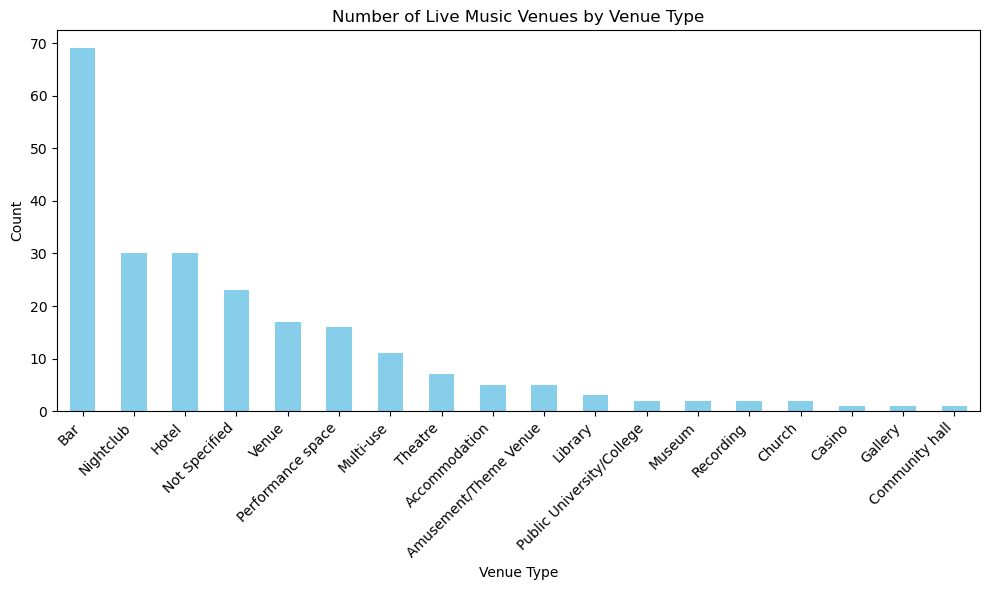

In [51]:


venue_type_counts = live_venues_data['space_type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
venue_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Live Music Venues by Venue Type')
plt.xlabel('Venue Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [52]:
landmarks_data.columns

Index(['Theme', 'Sub Theme', 'Feature Name', 'Co-ordinates', 'lat', 'lon'], dtype='object')

In [53]:
theme_colors = {
    'Place of Worship': 'purple',
    'Transport': 'blue',
    'Leisure/Recreation': 'orange',
    'Education Centre': 'green',
    'Place Of Assembly': 'red',
    'Mixed Use': 'cadetblue',
    'Health Services': 'darkred',
    'Community Use': 'lightgreen',
    'Vacant Land': 'gray',
    'Office': 'darkblue',
    'Purpose Built': 'darkgreen',
    'Specialist Residential Accommodation': 'darkpurple',
    'Residential Accommodation': 'lightblue',
    'Warehouse/Store': 'darkorange',
    'Retail': 'lightred',
    'Industrial': 'black'
}

In [54]:
landmarks_agg = landmarks_data.groupby(['Theme']).agg(
    {'lat': 'mean', 'lon': 'mean', 'Feature Name': 'count'}).reset_index()
landmarks_agg.rename(columns={'Feature Name': 'count'}, inplace=True)
landmarks_agg['theme_color'] = landmarks_agg['Theme'].map(theme_colors)
landmarks_agg['count'] = landmarks_agg['count']
landmarks_agg.columns
landmarks_agg.head()

Theme        lat         lon  count theme_color
0       Community Use -37.815339  144.964996     21  lightgreen
1    Education Centre -37.811644  144.962680     13       green
2     Health Services -37.808084  144.969916     11     darkred
3          Industrial -37.826231  144.923476      1       black
4  Leisure/Recreation -37.810153  144.959921     63      orange

In [55]:
theme_color_map = {theme: theme_colors.get(
    theme, 'gray') for theme in landmarks_agg['Theme']}

fig = px.scatter(landmarks_agg, x="lat", y="lon",
                 size="count", color="Theme", hover_name="Theme", text='Theme')

fig.update_traces(line=dict(color='darkgray', width=1))

fig.show()

pio.write_html(fig, "bubble_themes.html")

# 6. Discussion

Our initial idea relied on extensive data sets, which turned out to be a little less informative than first expected. In order to find other angles a lot of reseach was done on other data sets, data from other Australian cities to compare, but very few data sets were similar enough to compare in a valuable way. Even though we needed to shift our focus we managed to create an insightful story with very interesting and interactive visualizations that were very helpful both to learn and to provide a support to our story.

Given how open our theme is, and the shift in our idea, we decided to also approach with other external sources such as news articles and reports were linked to the data we found. This made the project bit less "comparative" and more an informative. The information provided in the project is useful for someone completly new to the city. 

We also wished to provided something insightful with machine learning, however given the change of focus and the more informative story, we decided to no delve into machine learning, however, it's something we considered for future work.

Also regarding future work, It would certainly be interesting to compare the data we found to Sydney, another Australian big city with almost the same amount of inhabitants, but since no data sets were found this could not be done. 

# 7. Contributions


Since we are only two members in our groups we've basically focus on two points of interest. While Afonso (s233177) focused more on the live venues, landmarks and parking (on-street and off-street) datasets, Kajsa focused more on the analysis for Jobs and Liveability datasets. Therefore, each of us took the lead role of developing the analysis, data handling, visualizations and writing for the assign part.

This doesn't discard moments where we exchanged, discussed and alligned on each others parts. Also data stats and handling were earlier more focused on the map datasets but eventually they also alligned together.